In [1]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/School/ECSE415/Assignment4/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 1A - Imports

In [2]:
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

rawdata = unpickle(filepath + "data_batch_1")
labelNames = [name.decode() for name in unpickle(filepath + "batches.meta")[b'label_names']]

print(labelNames)
print(rawdata[b'data'][0])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
[ 59  43  50 ... 140  84  72]


#### Convert raw batch data to numpy array of images

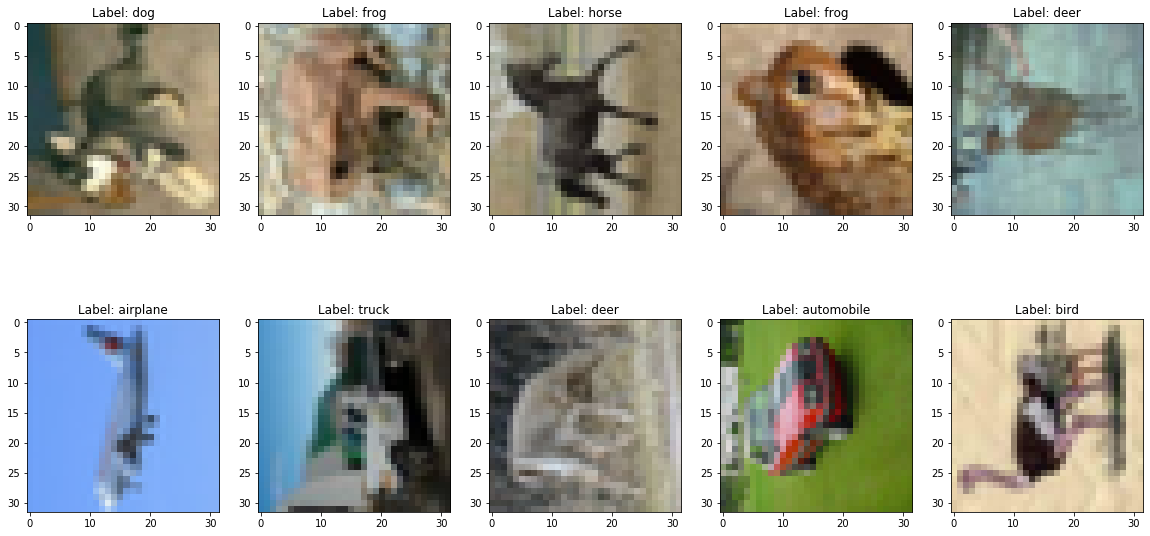

In [3]:
imageData = rawdata[b'data'].reshape((10000, 32, 32, 3), order='F')
imageLabels = np.asarray(rawdata[b'labels'])
imagesToShow = np.random.randint(0, 10000, 10)

# display 10 random images, along with their labels
plt.figure(figsize=(20, 10))
for imgslot, index in enumerate(imagesToShow):
    plt.subplot(2, 5, imgslot + 1)
    plt.imshow(imageData[index])
    plt.title("Label: {}".format(labelNames[imageLabels[index]]))
plt.show()

## 1B - Feature Extraction
### Mean Intensity Values

In [4]:
meanIntensityValues = np.empty((10000, 3))    # in order: R, G, B

for index, image in enumerate(imageData):
    for layer in range(3):
        meanIntensityValues[index][layer] = np.mean(image[:][:][layer])
print(meanIntensityValues.shape)

(10000, 3)


HoG

In [5]:
# return a vector of HoG features for the supplied image
def hog(img, cell_size_h=8, cell_size_w=8, block_size_h=2, block_size_w=2, orient_bins=9):
    cell_size = (cell_size_h, cell_size_w)  # h x w in pixels
    block_size = (block_size_h, block_size_w)  # h x w in cells
    nbins = orient_bins  # number of orientation bins
    
    hogBase = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                      img.shape[0] // cell_size[0] * cell_size[0]),
                            _blockSize=(block_size[1] * cell_size[1],
                                        block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                            _cellSize=(cell_size[1], cell_size[0]),
                            _nbins=nbins)

    n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])

    # Compute HoG features
    hog_feats = hogBase.compute(img) \
                   .reshape(n_cells[1] - block_size[1] + 1,
                            n_cells[0] - block_size[0] + 1,
                            block_size[1], block_size[0], nbins) \
                   .transpose((1, 0, 3, 2, 4))  # index blocks by rows first
    
    return (hog_feats)

hogFeatures = np.asarray([hog(image) for image in imageData])
print(hogFeatures.shape)

(10000, 3, 3, 2, 2, 9)


## 2 - SVM Classifiers
### Linear SVMs - Exploring Features

### Non-Linear SVMs - Exploring SVM Kernels

## 3 - Random Forest Classifiers
### RF - Exploring Performance of HoG Features

### RF - Exploring Different Number of Trees (estima-tors)

## 4 - Comparison of Classifiers
Use accuracy and the confusion matrix to evaluate the performance of classifiers.

### Performance Analysis

### Exploring Different Parameters of HoG

### Folded Validation

### Ensemble Classifier